In [1]:
import numpy as np
import xarray as xr
import os.path as op
from dask.diagnostics import ProgressBar
from scipy.interpolate import PchipInterpolator as pchip
from scipy.interpolate import interp2d
from matplotlib.gridspec import GridSpec as GS
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sosedir = '/swot/SUM05/takaya/SOSE/mon_ave/bgc'
woadir = '/swot/SUM05/takaya/WOA'

In [3]:
nitr_an = xr.open_dataset(op.join(woadir,'nitr/1deg/woa13_all_n00_01.nc'), decode_times=False)
phos_an = xr.open_dataset(op.join(woadir,'phos/1deg/woa13_all_p00_01.nc'), decode_times=False)
sili_an = xr.open_dataset(op.join(woadir,'sili/1deg/woa13_all_i00_01.nc'), decode_times=False)
nitr_an

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 180, lon: 360, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5300.0 5400.0 5500.0
  * time                (time) float32 6.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    n_an                (time, depth, lat, lon) float32 ...
    n_mn                (time, depth, lat, lon) float32 ...
    n_dd                (time, depth, lat, lon) float64 ...
    n_sd                (time, depth, lat, lon) float32 ...
    n_se                (time, depth, lat, lon) float32 ...
    n_oa    

In [17]:
nitr_an.n_an.attrs

OrderedDict([('standard_name', 'moles_concentration_of_nitrate_in_sea_water'),
             ('long_name',
              'Objectively analyzed mean fields for moles_concentration_of_nitrate_in_sea_water at standard depth levels.'),
             ('cell_methods', 'area: mean depth: mean time: mean'),
             ('grid_mapping', 'crs'),
             ('units', 'micromoles_per_liter')])

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


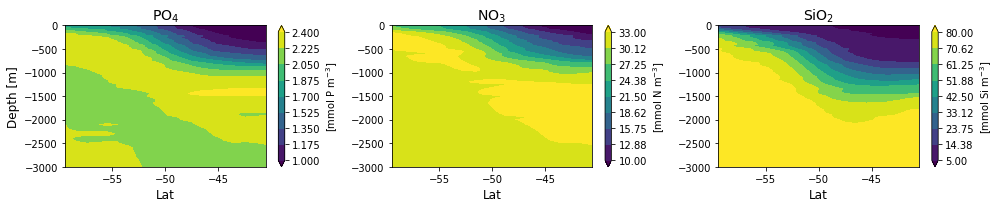

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,3))
fig.set_tight_layout(True)
i1 = ax1.contourf(phos_an.lat.sel(lat=slice(-60,-40)), -phos_an.depth.sel(depth=slice(0,3e3)),
                 phos_an.p_an[0].sel(lat=slice(-60,-40),lon=slice(100,150),depth=slice(0.,3e3)).mean('lon'),
                 levels=np.linspace(1.,2.4,9), extend='both')
i2 = ax2.contourf(nitr_an.lat.sel(lat=slice(-60,-40)), -nitr_an.depth.sel(depth=slice(0,3e3)),
                 nitr_an.n_an[0].sel(lat=slice(-60,-40),lon=slice(100,150),depth=slice(0.,3e3)).mean('lon'),
                 levels=np.linspace(10,33,9), extend='both')
i3 = ax3.contourf(sili_an.lat.sel(lat=slice(-60,-40)), -sili_an.depth.sel(depth=slice(0,3e3)),
                 sili_an.i_an[0].sel(lat=slice(-60,-40),lon=slice(100,150),depth=slice(0.,3e3)).mean('lon'),
                 levels=np.linspace(5.,80.,9), extend='both')
ax1.set_ylim([-30e2,0])
ax2.set_ylim([-30e2,0])
ax3.set_ylim([-30e2,0])
ax1.set_ylabel('Depth [m]', fontsize=12)
ax1.set_xlabel('Lat', fontsize=12)
ax2.set_xlabel('Lat', fontsize=12)
ax3.set_xlabel('Lat', fontsize=12)
ax1.set_title(r"PO$_4$", fontsize=14)
ax2.set_title(r"NO$_3$", fontsize=14)
ax3.set_title(r"SiO$_2$", fontsize=14)
c1 = fig.colorbar(i1, ax=ax1)
c2 = fig.colorbar(i2, ax=ax2)
c3 = fig.colorbar(i3, ax=ax3)
c1.set_label(r"[mmol P m$^{-3}$]")
c2.set_label(r"[mmol N m$^{-3}$]")
c3.set_label(r"[mmol Si m$^{-3}$]")
# plt.savefig(op.join(woadir, 'WOA_PNSi_40-60S_100-150E_top3000m.pdf'))

In [4]:
# Z = np.array([   -5. ,   -15. ,   -25. ,   -36. ,   -49. ,   -64. ,   -81.5,  -102. ,
#         -126. ,  -154. ,  -187. ,  -226. ,  -272. ,  -327. ,  -393. ,  -471.5,
#         -565. ,  -667.5,  -770.5,  -873.5,  -976.5, -1079.5, -1182.5, -1285.5,
#        -1388.5, -1491.5, -1594.5, -1697.5, -1800.5, -1903.5, -2006.5, -2109.5,
#        -2212.5, -2315.5, -2418.5, -2521.5, -2624.5, -2727.5, -2830.5, -2933.5])
Z = np.array([-5.000000e-01, -1.570000e+00, -2.790000e+00, -4.185000e+00,
           -5.780000e+00, -7.595000e+00, -9.660000e+00, -1.201000e+01,
           -1.468000e+01, -1.770500e+01, -2.112500e+01, -2.499000e+01,
           -2.934500e+01, -3.424000e+01, -3.972500e+01, -4.585500e+01,
           -5.269000e+01, -6.028000e+01, -6.868500e+01, -7.796500e+01,
           -8.817500e+01, -9.937000e+01, -1.116000e+02, -1.249150e+02,
           -1.393650e+02, -1.549900e+02, -1.718250e+02, -1.899000e+02,
           -2.092350e+02, -2.298550e+02, -2.517700e+02, -2.749850e+02,
           -2.995050e+02, -3.253200e+02, -3.524200e+02, -3.807900e+02,
           -4.104100e+02, -4.412550e+02, -4.733050e+02, -5.065400e+02,
           -5.409350e+02, -5.764650e+02, -6.131100e+02, -6.508550e+02,
           -6.896850e+02, -7.295950e+02, -7.705850e+02, -8.126600e+02,
           -8.558350e+02, -9.001350e+02, -9.455950e+02, -9.922600e+02,
           -1.040180e+03, -1.089425e+03, -1.140080e+03, -1.192235e+03,
           -1.246005e+03, -1.301520e+03, -1.358920e+03, -1.418375e+03,
           -1.480075e+03, -1.544225e+03, -1.611060e+03, -1.680845e+03,
           -1.753875e+03, -1.830475e+03, -1.911015e+03, -1.995905e+03,
           -2.085595e+03, -2.180595e+03, -2.281470e+03, -2.388845e+03,
           -2.503415e+03, -2.625955e+03, -2.757325e+03, -2.912665e+03])

In [5]:
nitr_mn = xr.open_mfdataset(op.join(woadir,'nitr/1deg/monthly/*.nc'), decode_times=False)
phos_mn = xr.open_mfdataset(op.join(woadir,'phos/1deg/monthly/*.nc'), decode_times=False)
sili_mn = xr.open_mfdataset(op.join(woadir,'sili/1deg/monthly/*.nc'), decode_times=False)
sili_mn

<xarray.Dataset>
Dimensions:             (depth: 37, lat: 180, lon: 360, nbounds: 2, time: 12)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 15.0 ... 450.0 475.0 500.0
  * time                (time) float64 0.5 1.5 2.5 3.5 4.5 ... 8.5 9.5 10.5 11.5
Dimensions without coordinates: nbounds
Data variables:
    crs                 (time) int32 -2147483647 -2147483647 ... -2147483647
    lat_bnds            (time, lat, nbounds) float32 dask.array<shape=(12, 180, 2), chunksize=(1, 180, 2)>
    lon_bnds            (time, lon, nbounds) float32 dask.array<shape=(12, 360, 2), chunksize=(1, 360, 2)>
    depth_bnds          (time, depth, nbounds) float32 dask.array<shape=(12, 37, 2), chunksize=(1, 37, 2)>
    climatology_bounds  (time, nbounds) float32 dask.array<shape=(12, 2), chunksize=(1, 2)>
    i_an               

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


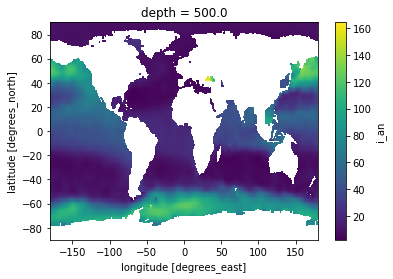

In [6]:
sili_mn.i_an.mean('time')[-1].plot()

In [9]:
phos_mon = xr.DataArray(np.zeros((12,102,180,360)),dims=['time','depth','lat','lon'],
                        coords={'time':phos_mn.time.data,'depth':phos_an.depth.data,
                               'lat':phos_mn.lat.data,'lon':phos_mn.lon.data})
nitr_mon = xr.DataArray(np.zeros((12,102,180,360)),dims=['time','depth','lat','lon'],
                        coords={'time':nitr_mn.time.data,'depth':nitr_an.depth.data,
                               'lat':nitr_mn.lat.data,'lon':nitr_mn.lon.data})
sili_mon = xr.DataArray(np.zeros((12,102,180,360)),dims=['time','depth','lat','lon'],
                        coords={'time':sili_mn.time.data,'depth':sili_an.depth.data,
                               'lat':sili_mn.lat.data,'lon':sili_mn.lon.data})
phos_mon[:,:37] = phos_mn.p_an
phos_mon[:,37:] = phos_an.p_an[0,37:]
nitr_mon[:,:37] = nitr_mn.n_an
nitr_mon[:,37:] = nitr_an.n_an[0,37:]
sili_mon[:,:37] = sili_mn.i_an
sili_mon[:,37:] = sili_an.i_an[0,37:]

sili_mon

<xarray.DataArray (time: 12, depth: 102, lat: 180, lon: 360)>
array([[[[      nan, ...,       nan],
         ...,
         [13.851043, ..., 13.851043]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [      nan, ...,       nan]]],


       ...,


       [[[      nan, ...,       nan],
         ...,
         [ 5.776092, ...,  5.776092]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [      nan, ...,       nan]]]])
Coordinates:
  * time     (time) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [11]:
func = pchip(phos_mon.depth, phos_mon[0].sel(lat=-50.,method='nearest').sel(lon=slice(50,150)).mean(['lon']), axis=0)
phos_jan = func(np.abs(Z))
func = pchip(nitr_mon.depth, nitr_mon[0].sel(lat=-50.,method='nearest').sel(lon=slice(50,150)).mean(['lon']), axis=0)
nitr_jan = func(np.abs(Z))
func = pchip(sili_mon.depth, sili_mon[0].sel(lat=-50.,method='nearest').sel(lon=slice(50,150)).mean(['lon']), axis=0)
sili_jan = func(np.abs(Z))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
nlat = -45
func = pchip(phos_mon.depth, phos_mon.sel(lat=nlat,method='nearest').sel(lon=slice(50,150)).mean(['lon']), axis=1)
phos_mon = func(np.abs(Z))
func = pchip(nitr_mon.depth, nitr_mon.sel(lat=nlat,method='nearest').sel(lon=slice(50,150)).mean(['lon']), axis=1)
nitr_mon = func(np.abs(Z))
func = pchip(sili_mon.depth, sili_mon.sel(lat=nlat,method='nearest').sel(lon=slice(50,150)).mean(['lon']), axis=1)
sili_mon = func(np.abs(Z))

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:121: RuntimeWarning: invalid value encountered in greater
  mask2 = (np.sign(m0) != np.sign(m1)) & (np.abs(d) > 3.*np.abs(m0))


Text(0.5, 1.0, 'NO$_3$')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


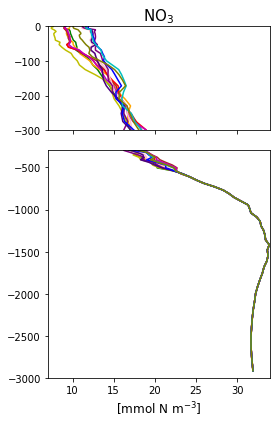

In [13]:
nz = 13
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
colors = ['g','y','orange','brown','r','m','pink','purple','indigo','b','c','olive']

fig = plt.figure(figsize=(4,6))
fig.set_tight_layout(True)
gs = GS(3, 1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1:,0])
for i in range(12):
    ax1.plot(nitr_mon.T[:,i], Z[:], label=months[i], color=colors[i])
    ax2.plot(nitr_mon.T[:,i], Z[:], label=months[i], color=colors[i])
ax1.set_xticklabels([])
ax1.set_xlim([7,34])
ax2.set_xlim([7,34])
ax1.set_ylim([Z[nz-1],0])
ax2.set_ylim([-3000,Z[nz]])
ax1.set_ylim([-300,0])
ax2.set_ylim([-3000,-300])
ax2.set_xlabel(r"[mmol N m$^{-3}$]", fontsize=12)
ax1.set_title(r"NO$_3$", fontsize=15)

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


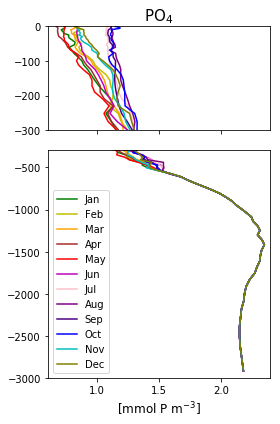

In [14]:
fig = plt.figure(figsize=(4,6))
fig.set_tight_layout(True)
gs = GS(3, 1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1:,0])
for i in range(12):
    ax1.plot(phos_mon.T[:,i], Z[:], label=months[i], color=colors[i])
    ax2.plot(phos_mon.T[:,i], Z[:], label=months[i], color=colors[i])
ax1.set_xticklabels([])

ax1.set_xlim([.6,2.4])
ax2.set_xlim([.6,2.4])
ax1.set_ylim([-300,0])
ax2.set_ylim([-3000,-300])
ax2.set_xlabel(r"[mmol P m$^{-3}$]", fontsize=12)
ax1.set_title(r"PO$_4$", fontsize=15)
ax2.legend(loc='lower left')

Text(0.5, 1.0, 'SiO$_2$')

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


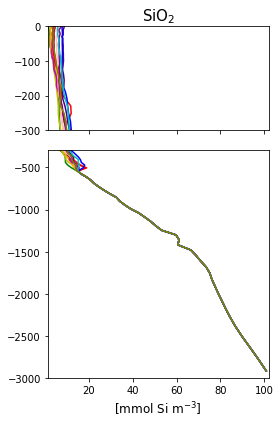

In [15]:
fig = plt.figure(figsize=(4,6))
fig.set_tight_layout(True)
gs = GS(3, 1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1:,0])
for i in range(12):
    ax1.plot(sili_mon.T[:,i], Z[:], label=months[i], color=colors[i])
    ax2.plot(sili_mon.T[:,i], Z[:], label=months[i], color=colors[i])
ax1.set_xticklabels([])

ax1.set_xlim([1.2,1.02e2])
ax2.set_xlim([1.2,1.02e2])
ax1.set_ylim([-300,0])
ax2.set_ylim([-3000,-300])
ax2.set_xlabel(r"[mmol Si m$^{-3}$]", fontsize=12)
ax1.set_title(r"SiO$_2$", fontsize=15)

In [35]:
dsave = xr.DataArray(phos_mon, dims=['month','Z'],
                    coords={'month':range(1,13),'Z':Z}).to_dataset('Phos')
dsave['Nitr'] = xr.DataArray(nitr_mon, dims=['month','Z'],
                            coords={'month':range(1,13),'Z':Z})
dsave['Sili'] = xr.DataArray(sili_mon, dims=['month','Z'],
                            coords={'month':range(1,13),'Z':Z})
# dsave.to_netcdf(op.join(woadir,'WOA13_40layers_PNI.nc'))
# dsave

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the order of the arguments on DataArray.to_dataset has changed; you now need to supply ``name`` as a keyword argument
  


In [16]:
ds = xr.open_dataset(op.join(sosedir, 'bsose_i105_2008to2012_monthly_Fe.nc'))
fe = ds.Fe
print(ds.Fe.attrs)

month = np.tile(range(12),5)
fe.coords['month'] = ('iTIME',month)

with ProgressBar():
    fe = xr.DataArray(fe.groupby('month').mean('iTIME').data, dims=['month','z','lat','lon'],
                     coords={'month':range(1,13),'z':-ds.depth.data,
                            'lat':ds.lat.data,'lon':ds.lon.data}
                     ).compute()
    
fe

OrderedDict([('dimension', 'mol Fe/m3')])


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray (month: 12, z: 52, lat: 294, lon: 1080)>
array([[[[         nan, ...,          nan],
         ...,
         [1.174732e-07, ..., 1.173725e-07]],

        ...,

        [[         nan, ...,          nan],
         ...,
         [         nan, ...,          nan]]],


       ...,


       [[[         nan, ...,          nan],
         ...,
         [1.123827e-07, ..., 1.128380e-07]],

        ...,

        [[         nan, ...,          nan],
         ...,
         [         nan, ...,          nan]]]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * z        (z) float64 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
  * lat      (lat) float64 -77.97 -77.9 -77.83 -77.75 ... -30.38 -30.09 -29.79
  * lon      (lon) float64 0.1667 0.5 0.8333 1.167 ... 358.8 359.2 359.5 359.8

/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


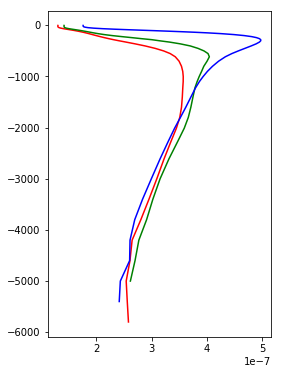

In [17]:
fig, ax = plt.subplots(figsize=(4,6))
ax.plot(fe.sel(lat=-45,method='nearest').sel(lon=slice(50,150)).mean(['month','lon']), fe.z, color='r')
ax.plot(fe.sel(lat=-50,method='nearest').sel(lon=slice(50,150)).mean(['month','lon']), fe.z, color='g')
ax.plot(fe.sel(lat=-60,method='nearest').sel(lon=slice(50,150)).mean(['month','lon']), fe.z, color='b')

In [19]:
nlatfe = -50
func = pchip(np.abs(fe.z), fe.sel(lat=nlatfe,method='nearest').sel(lon=slice(50,150)).mean(['lon']), axis=1)
fe_mon = xr.DataArray(1e3*func(np.abs(Z)), dims=['month','Z'],
                     coords={'month':range(1,13),'Z':Z})
print(nlat,fe_mon)

-45 <xarray.DataArray (month: 12, Z: 76)>
array([[0.000113, 0.000113, 0.000113, ..., 0.000331, 0.000325, 0.000319],
       [0.00011 , 0.00011 , 0.00011 , ..., 0.000331, 0.000325, 0.000319],
       [0.000112, 0.000112, 0.000112, ..., 0.000331, 0.000325, 0.000319],
       ...,
       [0.000176, 0.000175, 0.000175, ..., 0.00033 , 0.000324, 0.000318],
       [0.000151, 0.000151, 0.000151, ..., 0.00033 , 0.000324, 0.000318],
       [0.000124, 0.000124, 0.000124, ..., 0.00033 , 0.000324, 0.000318]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * Z        (Z) float64 -0.5 -1.57 -2.79 ... -2.626e+03 -2.757e+03 -2.913e+03


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:121: RuntimeWarning: invalid value encountered in greater
  mask2 = (np.sign(m0) != np.sign(m1)) & (np.abs(d) > 3.*np.abs(m0))


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


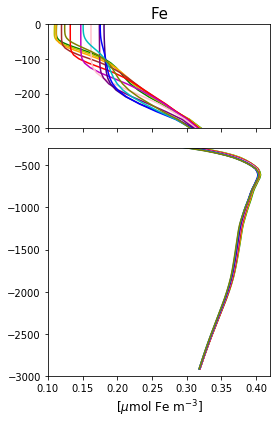

In [20]:
nz = 13
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
colors = ['g','y','orange','brown','r','m','pink','purple','indigo','b','c','olive']
fig = plt.figure(figsize=(4,6))
fig.set_tight_layout(True)
gs = GS(3, 1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1:,0])
for i in range(12):
    ax1.plot(fe_mon.T[:,i]*1e3, Z[:], label=months[i], color=colors[i])
    ax2.plot(fe_mon.T[:,i]*1e3, Z[:], label=months[i], color=colors[i])
ax1.set_xticklabels([])

ax1.set_xlim([0.1,0.42])
ax2.set_xlim([0.1,0.42])
ax1.set_ylim([-300,0])
ax2.set_ylim([-3000,-300])
ax2.set_xlabel(r"[$\mu$mol Fe m$^{-3}$]", fontsize=12)
ax1.set_title(r"Fe", fontsize=15)

In [33]:
def gen_binary(da, dtype='>f8', nz=15, res=1e0, X=1e6, Y=2e6, ddir=woadir, deg=45, savefile='FeT-seasonal-relax_BSOSE'):
    
    nx = int(X/(res*1e3))
    ny = int(Y/(res*1e3))
    dnew = (da.data[:,:,np.newaxis,np.newaxis]*np.ones((ny,nx)))
    nS = int(1.4e2/res)
    dnew[:,:,:nS] = 0.
    print(dnew.shape)
        
    fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_tight_layout(True)
    im1 = ax1.pcolormesh(range(1,13),da.Z[:nz],dnew[:,:,-1,0].T[:nz])
    im2 = ax2.pcolormesh(np.arange(0,X*1e-3,res),np.arange(0,Y*1e-3,res),dnew[0,0])
    fig.colorbar(im2, ax=ax2)
    fig.colorbar(im1, ax=ax1)
    
    dnew.astype(dtype).tofile(op.join(ddir, savefile + '%02dS-%03dkm.bin' % (int(deg),int(res))))

(12, 40, 20, 10)
(12, 40, 20, 10)
(12, 40, 20, 10)
(12, 40, 20, 10)


/home/takaya/miniconda3/envs/uptodate/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


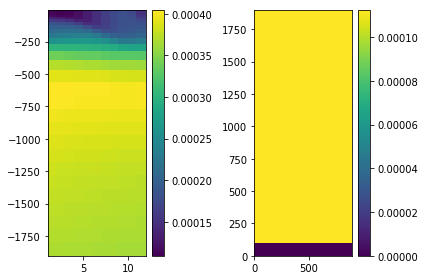

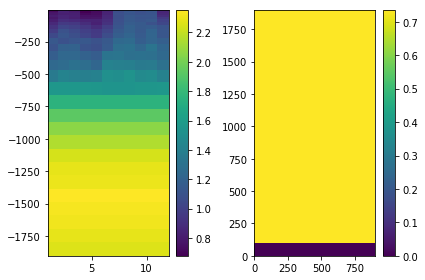

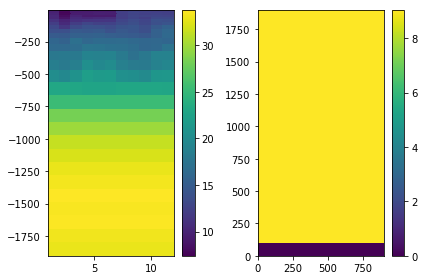

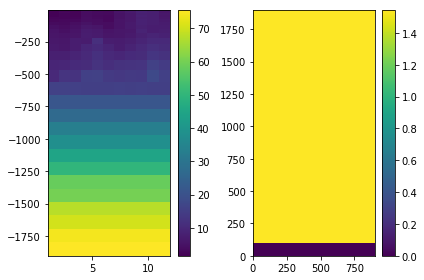

In [36]:
gen_binary(fe_mon, nz=30, res=100e0, deg=50, ddir=sosedir)
gen_binary(dsave.Phos, nz=30, res=100e0, ddir=woadir, savefile='PO4-seasonal-relax_WOA13')
gen_binary(dsave.Nitr, nz=30, res=100e0, ddir=woadir, savefile='NO3-seasonal-relax_WOA13')
gen_binary(dsave.Sili, nz=30, res=100e0, ddir=woadir, savefile='iO2-seasonal-relax_WOA13')